# MAST30034 Assignment2

## 3.Stage1 Descriptive statistics of Selected Attributes

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch
#import geopandas as gpd

In [28]:
def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

In [2]:
#data = pd.read_feather("2018_finished.feather")
data = pd.read_feather("2018_sample.feather")

In [3]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,Date,...,Time_h,Type,DATE,AWND,PRCP,SNOW,SNWD,TAVG,Weather Type,Tip
0,2018-01-01 00:00:25,2018-01-01 00:06:08,1,1.36,43,237,6.5,2.34,10.14,2018-01-01,...,0,Holiday,2018-01-01,7.83,0.0,0.0,0.0,-10.555556,N,1
1,2018-01-01 00:03:46,2018-01-01 00:08:42,1,0.70,148,79,5.0,1.25,7.55,2018-01-01,...,0,Holiday,2018-01-01,7.83,0.0,0.0,0.0,-10.555556,N,1
2,2018-01-01 00:05:09,2018-01-01 00:09:03,3,0.90,263,43,5.5,1.35,8.15,2018-01-01,...,0,Holiday,2018-01-01,7.83,0.0,0.0,0.0,-10.555556,N,1
3,2018-01-01 00:08:03,2018-01-01 00:16:01,2,1.45,107,148,7.5,1.76,10.56,2018-01-01,...,0,Holiday,2018-01-01,7.83,0.0,0.0,0.0,-10.555556,N,1
4,2018-01-01 00:09:20,2018-01-01 00:39:38,1,2.60,162,48,19.0,4.05,24.35,2018-01-01,...,0,Holiday,2018-01-01,7.83,0.0,0.0,0.0,-10.555556,N,1


In [4]:
col = ["trip_distance","Druation","tip_amount","fare_amount","total_amount","AWND","PRCP","SNOW","SNWD","TAVG"]

In [5]:
data[col].describe()

,trip_distance,Druation,tip_amount,fare_amount,total_amount,AWND,PRCP,SNOW,SNWD,TAVG
count,648298.000000,648298.000000,648298.000000,648298.000000,648298.000000,648298.000000,648298.000000,648298.000000,648298.000000,648298.000000
mean,2.175238,12.735872,2.173527,10.765564,14.166006,3.594913,0.173086,0.081074,0.178115,13.020288
std,1.800634,8.134927,1.339366,5.847748,7.182152,2.951554,0.388584,0.688861,0.928474,9.662078
min,0.010000,1.016667,0.000000,2.500000,3.300000,0.000000,0.000000,0.000000,0.000000,-12.500000
25%,1.000000,6.700000,1.260000,6.500000,9.120000,1.120000,0.000000,0.000000,0.000000,5.000000
50%,1.600000,10.850000,1.950000,9.000000,12.300000,3.360000,0.000000,0.000000,0.000000,11.944444
75%,2.690000,16.816667,2.750000,13.500000,17.150000,5.590000,0.110000,0.000000,0.000000,22.222222
max,9.760000,117.400000,8.040000,40.500000,47.790000,12.970000,2.900000,9.800000,7.900000,30.833333


### 1.Passengner Count
https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page                
In pervious section, we make a restriction on 7 passenger

In [7]:
passenger_count = data["passenger_count"].value_counts()
passenger_count.index

Int64Index([1, 2, 5, 3, 6, 4], dtype='int64')

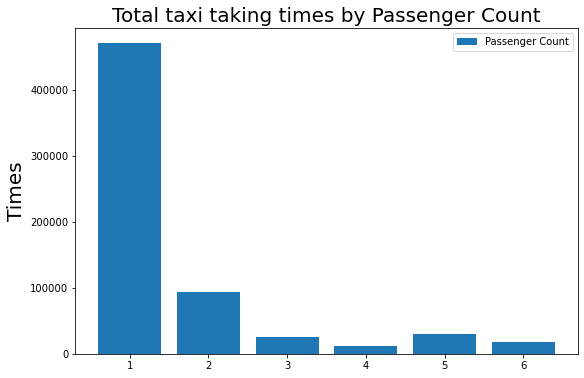

In [8]:
plt.figure(figsize=(9,6))
plt.bar(passenger_count.index,passenger_count,label = "Passenger Count")
plt.ylabel('Times',fontsize = 20)
plt.title('Total taxi taking times by Passenger Count',fontsize = 20)
plt.xticks(passenger_count.index)
plt.legend()
plt.savefig("Total taxi taking times by Passenger Count.png")
plt.show()

### 1.Trip_distance

In [9]:
data["trip_distance"].describe()

count    648298.000000
mean          2.175238
std           1.800634
min           0.010000
25%           1.000000
50%           1.600000
75%           2.690000
max           9.760000
Name: trip_distance, dtype: float64

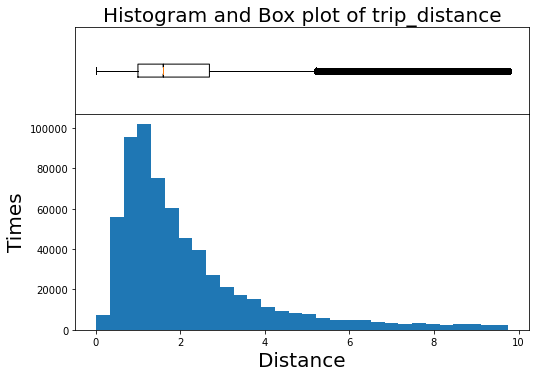

In [10]:
x = data["trip_distance"]

# setup the figure and axes
fig = plt.figure(figsize=(9,6))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=30)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
for ax in [bpAx, histAx]:
    ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark

plt.ylabel('Times',fontsize = 20)
plt.xlabel('Distance',fontsize = 20)
plt.title('Histogram and Box plot of trip_distance', y=1.4,fontsize = 20)

plt.savefig("Histogram and Box plot of trip_distance.png")

plt.show()


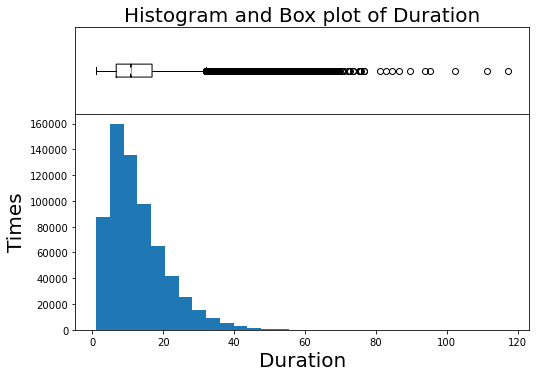

In [22]:
x = data["Druation"]

# setup the figure and axes
fig = plt.figure(figsize=(9,6))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=30)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
for ax in [bpAx, histAx]:
    ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark

plt.ylabel('Times',fontsize = 20)
plt.xlabel('Duration',fontsize = 20)
plt.title('Histogram and Box plot of Duration', y=1.4,fontsize = 20)

plt.savefig("Histogram and Box plot of Duration.png")

plt.show()


### 2.Tips Amount

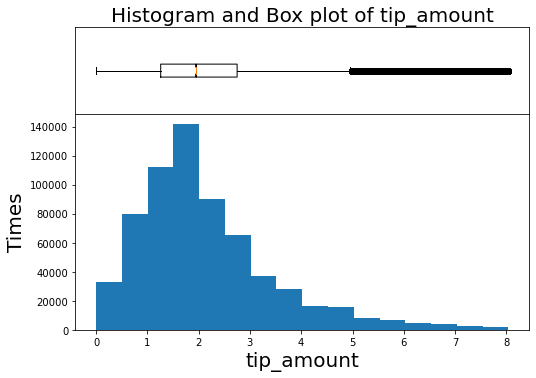

In [11]:
x = data["tip_amount"]

# setup the figure and axes
fig = plt.figure(figsize=(9,6))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=16)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
for ax in [bpAx, histAx]:
    ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark

plt.ylabel('Times',fontsize = 20)
plt.xlabel('tip_amount',fontsize = 20)
plt.title('Histogram and Box plot of tip_amount', y=1.4,fontsize = 20)
plt.savefig("Histogram and Box plot of tip_amount.png")


plt.show()

### 3.Total Amount 

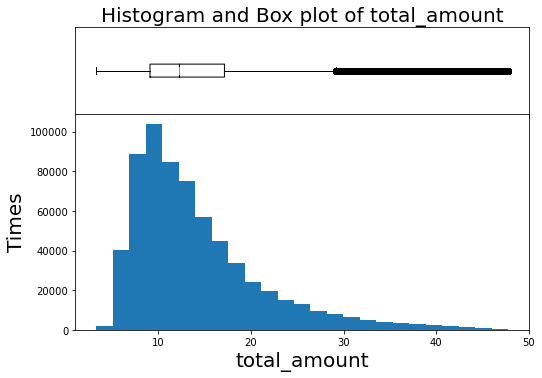

In [12]:
x = data["total_amount"]

# setup the figure and axes
fig = plt.figure(figsize=(9,6))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=25)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
for ax in [bpAx, histAx]:
    ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark

plt.ylabel('Times',fontsize = 20)
plt.xlabel('total_amount',fontsize = 20)
plt.title('Histogram and Box plot of total_amount', y=1.4,fontsize = 20)
plt.savefig("Histogram and Box plot of total_amount.png")

plt.show()

### 4.Weather 

#### 4.1 Type Count

In [3]:
weather = pd.read_feather("cleaned_2018_NewYork_weather.feather")

In [4]:
weather

,DATE,AWND,PRCP,SNOW,SNWD,TAVG,Weather Type
0,2018-01-01,7.83,0.00,0.0,0.0,-10.555556,N
1,2018-01-02,8.05,0.00,0.0,0.0,-6.944444,N
2,2018-01-03,3.13,0.00,0.0,0.0,-5.000000,N
3,2018-01-04,12.53,0.76,9.8,1.2,-4.444444,Y
4,2018-01-05,12.97,0.00,0.0,7.1,-10.000000,N
...,...,...,...,...,...,...,...
360,2018-12-27,0.00,0.00,0.0,0.0,4.722222,N
361,2018-12-28,0.00,1.15,0.0,0.0,10.833333,Y
362,2018-12-29,0.00,0.00,0.0,0.0,8.888889,N
363,2018-12-30,0.00,0.00,0.0,0.0,2.500000,N


In [5]:
weather_count = weather["Weather Type"].value_counts()

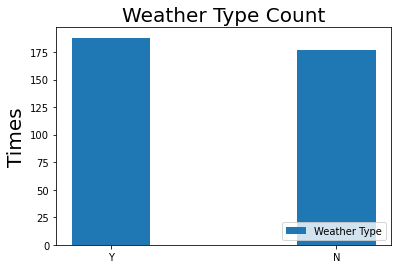

In [6]:
plt.figure(figsize=(6,4))
plt.bar(weather_count.index,weather_count,0.35,label = "Weather Type")
plt.ylabel('Times',fontsize = 20)
plt.title('Weather Type Count',fontsize = 20)
plt.xticks(weather_count.index)
plt.legend(loc = 4)
plt.show()

#### 4.2 Average Temperature

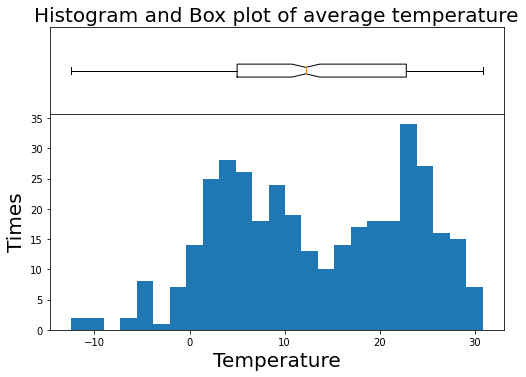

In [19]:
x = weather["TAVG"]

# setup the figure and axes
fig = plt.figure(figsize=(9,6))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=25)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
for ax in [bpAx, histAx]:
    ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark

plt.ylabel('Times',fontsize = 20)
plt.xlabel('Temperature',fontsize = 20)
plt.title('Histogram and Box plot of average temperature', y=1.4,fontsize = 20)
plt.savefig("Histogram and Box plot of average temperature.png")

plt.show()

#### 4.3 Average Wind

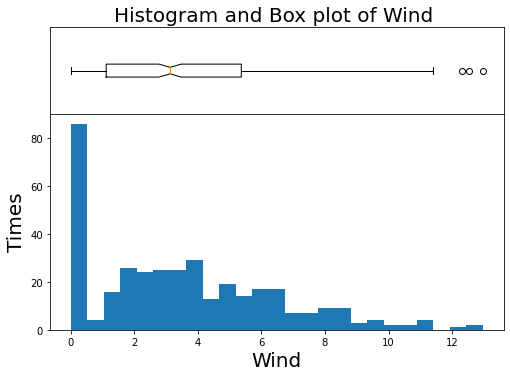

In [8]:
x = weather["AWND"]

# setup the figure and axes
fig = plt.figure(figsize=(9,6))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=25)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
for ax in [bpAx, histAx]:
    ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark

plt.ylabel('Times',fontsize = 20)
plt.xlabel('Wind',fontsize = 20)
plt.title('Histogram and Box plot of Wind ', y=1.4,fontsize = 20)
plt.savefig("Histogram and Box plot of Wind.png")

plt.show()

#### 4.4 Average PRCP

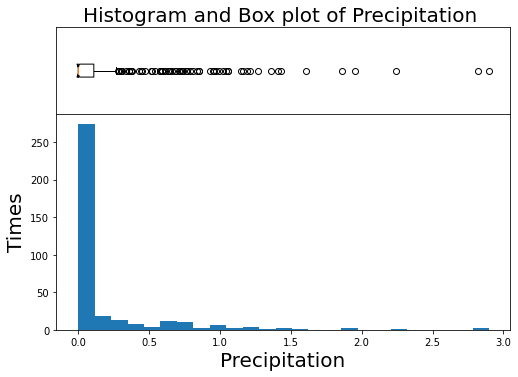

In [11]:
x = weather["PRCP"]

# setup the figure and axes
fig = plt.figure(figsize=(9,6))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=25)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
for ax in [bpAx, histAx]:
    ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark

plt.ylabel('Times',fontsize = 20)
plt.xlabel('Precipitation',fontsize = 20)
plt.title('Histogram and Box plot of Precipitation ', y=1.4,fontsize = 20)
plt.savefig("Histogram and Box plot of Precipitation.png")

plt.show()

#### 4.5 Average SNOW

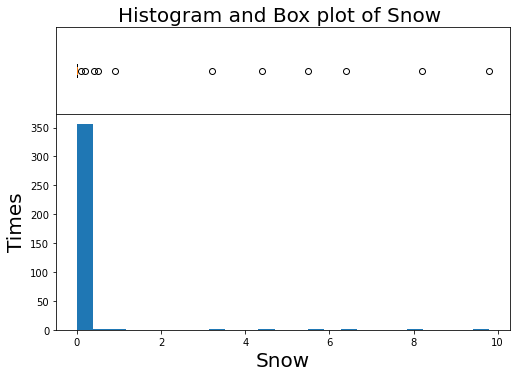

In [12]:
x = weather["SNOW"]

# setup the figure and axes
fig = plt.figure(figsize=(9,6))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=25)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
for ax in [bpAx, histAx]:
    ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark

plt.ylabel('Times',fontsize = 20)
plt.xlabel('Snow',fontsize = 20)
plt.title('Histogram and Box plot of Snow ', y=1.4,fontsize = 20)
plt.savefig("Histogram and Box plot of SNOW.png")

plt.show()

### 5.Date Type Count

In [26]:
date_count = data.groupby("Type")["Date"].nunique()

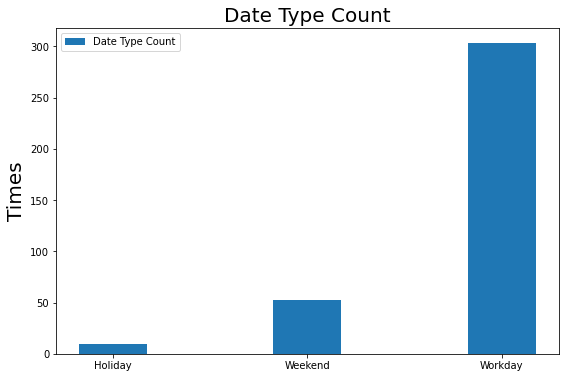

In [27]:
plt.figure(figsize=(9,6))
plt.bar(date_count.index,date_count,0.35,label = "Date Type Count")
plt.ylabel('Times',fontsize = 20)
plt.title('Date Type Count',fontsize = 20)
plt.xticks(date_count.index)
plt.legend()
plt.savefig("Date Type Count.png")
plt.show()

#### 5.1 Average Date Type Freq Count

In [28]:
date_feq_count = data["Type"].value_counts()

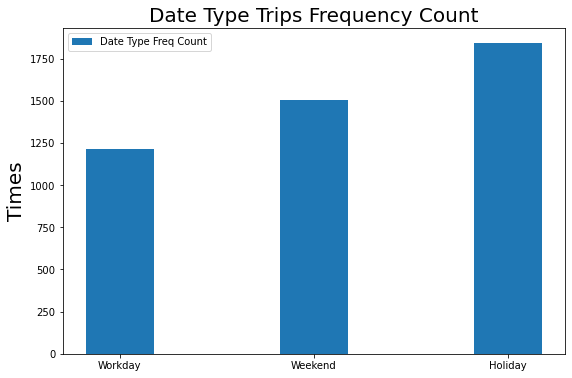

In [29]:
plt.figure(figsize=(9,6))
plt.bar(date_feq_count.index,date_feq_count/date_count,0.35,label = "Date Type Freq Count")
plt.ylabel('Times',fontsize = 20)
plt.title('Date Type Trips Frequency Count',fontsize = 20)
plt.xticks(date_feq_count.index)
plt.legend()
plt.savefig("Average Date Type Freq Count.png")
plt.show()

### 6.Trips Count by Time Series

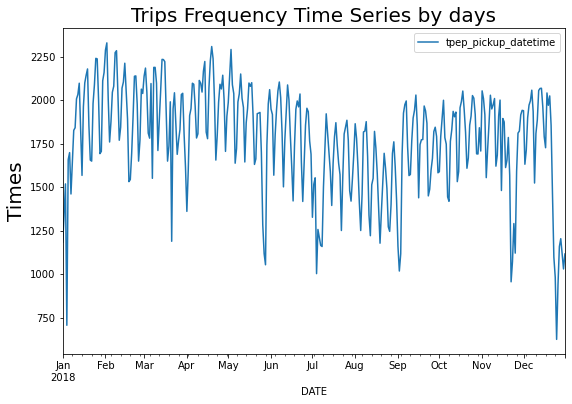

In [30]:
data['DATE'] = pd.to_datetime(data['DATE'])
plt.figure(figsize=(9,6))
data.groupby("DATE").count()["tpep_pickup_datetime"].plot()
plt.ylabel('Times',fontsize = 20)
plt.title('Trips Frequency Time Series by days',fontsize = 20)
plt.legend()
plt.savefig("Trips Frequency Time Series by days.png")
plt.show()

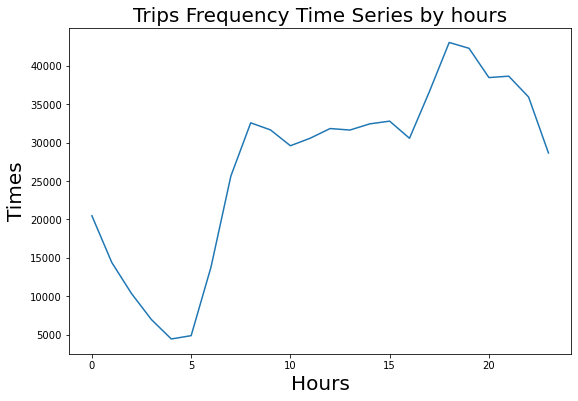

In [31]:
#data['Time_h'] = pd.to_datetime(data['Time_h'])
plt.figure(figsize=(9,6))
count = data.groupby("Time_h").count()["tpep_pickup_datetime"]
plt.plot(count.index,count,)
plt.ylabel('Times',fontsize = 20)
plt.xlabel('Hours',fontsize = 20)
plt.title('Trips Frequency Time Series by hours',fontsize = 20)
plt.savefig("Trips Frequency Time Series by hours.png")
plt.show()

### 7.Pair Plot

In [10]:
pair[col]

,trip_distance,Druation,tip_amount,fare_amount,total_amount,AWND,PRCP,SNOW,SNWD,TAVG
195901,7.59,23.783333,4.00,24.5,29.80,5.59,0.00,0.0,0.0,21.666667
280878,2.10,7.466667,0.00,8.5,9.80,8.28,0.44,0.0,0.0,20.000000
450176,2.33,12.450000,0.00,10.5,11.80,6.26,0.02,0.0,0.0,18.888889
516404,1.50,5.683333,1.46,6.5,8.76,0.00,0.01,0.0,0.0,11.944444
301017,4.70,19.516667,3.95,18.5,23.75,2.46,0.00,0.0,0.0,18.611111
...,...,...,...,...,...,...,...,...,...,...
82728,2.20,11.533333,2.50,10.0,13.80,5.59,0.00,0.0,0.0,0.000000
556586,2.51,25.383333,3.46,16.5,20.76,0.00,0.68,0.0,0.0,12.222222
194859,5.53,29.816667,4.66,22.5,27.96,5.59,0.00,0.0,0.0,21.666667
221795,0.70,4.233333,1.35,5.0,8.15,4.92,0.10,0.0,0.0,16.944444


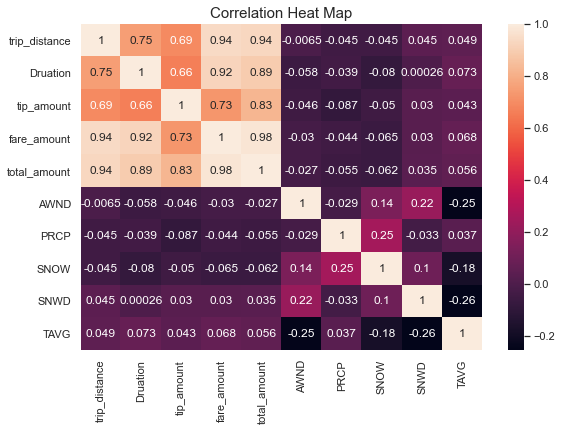

In [8]:
sns.set(rc={'figure.figsize':(9,6)})
w_corrMatrix =c.corr() 
sns.heatmap(w_corrMatrix, annot=True)
plt.title('Correlation Heat Map',fontsize = 15)
plt.savefig("Correlation Heat Map.png")
plt.show()

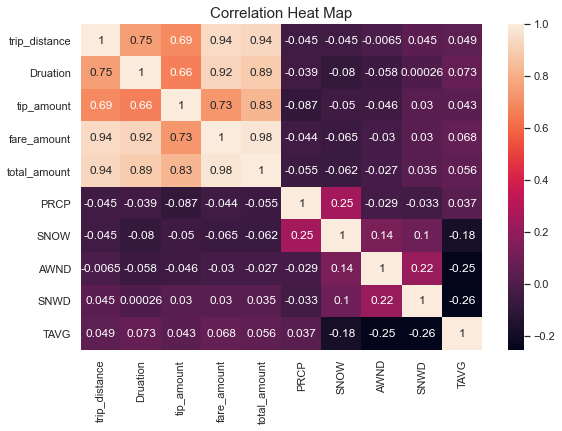

In [35]:
sns.set(rc={'figure.figsize':(9,6)})
w_corrMatrix =pair[col].corr() 
sns.heatmap(cluster_corr(w_corrMatrix), annot=True)
plt.title('Correlation Heat Map',fontsize = 15)
plt.savefig("Correlation Heat Map.png")
plt.show()

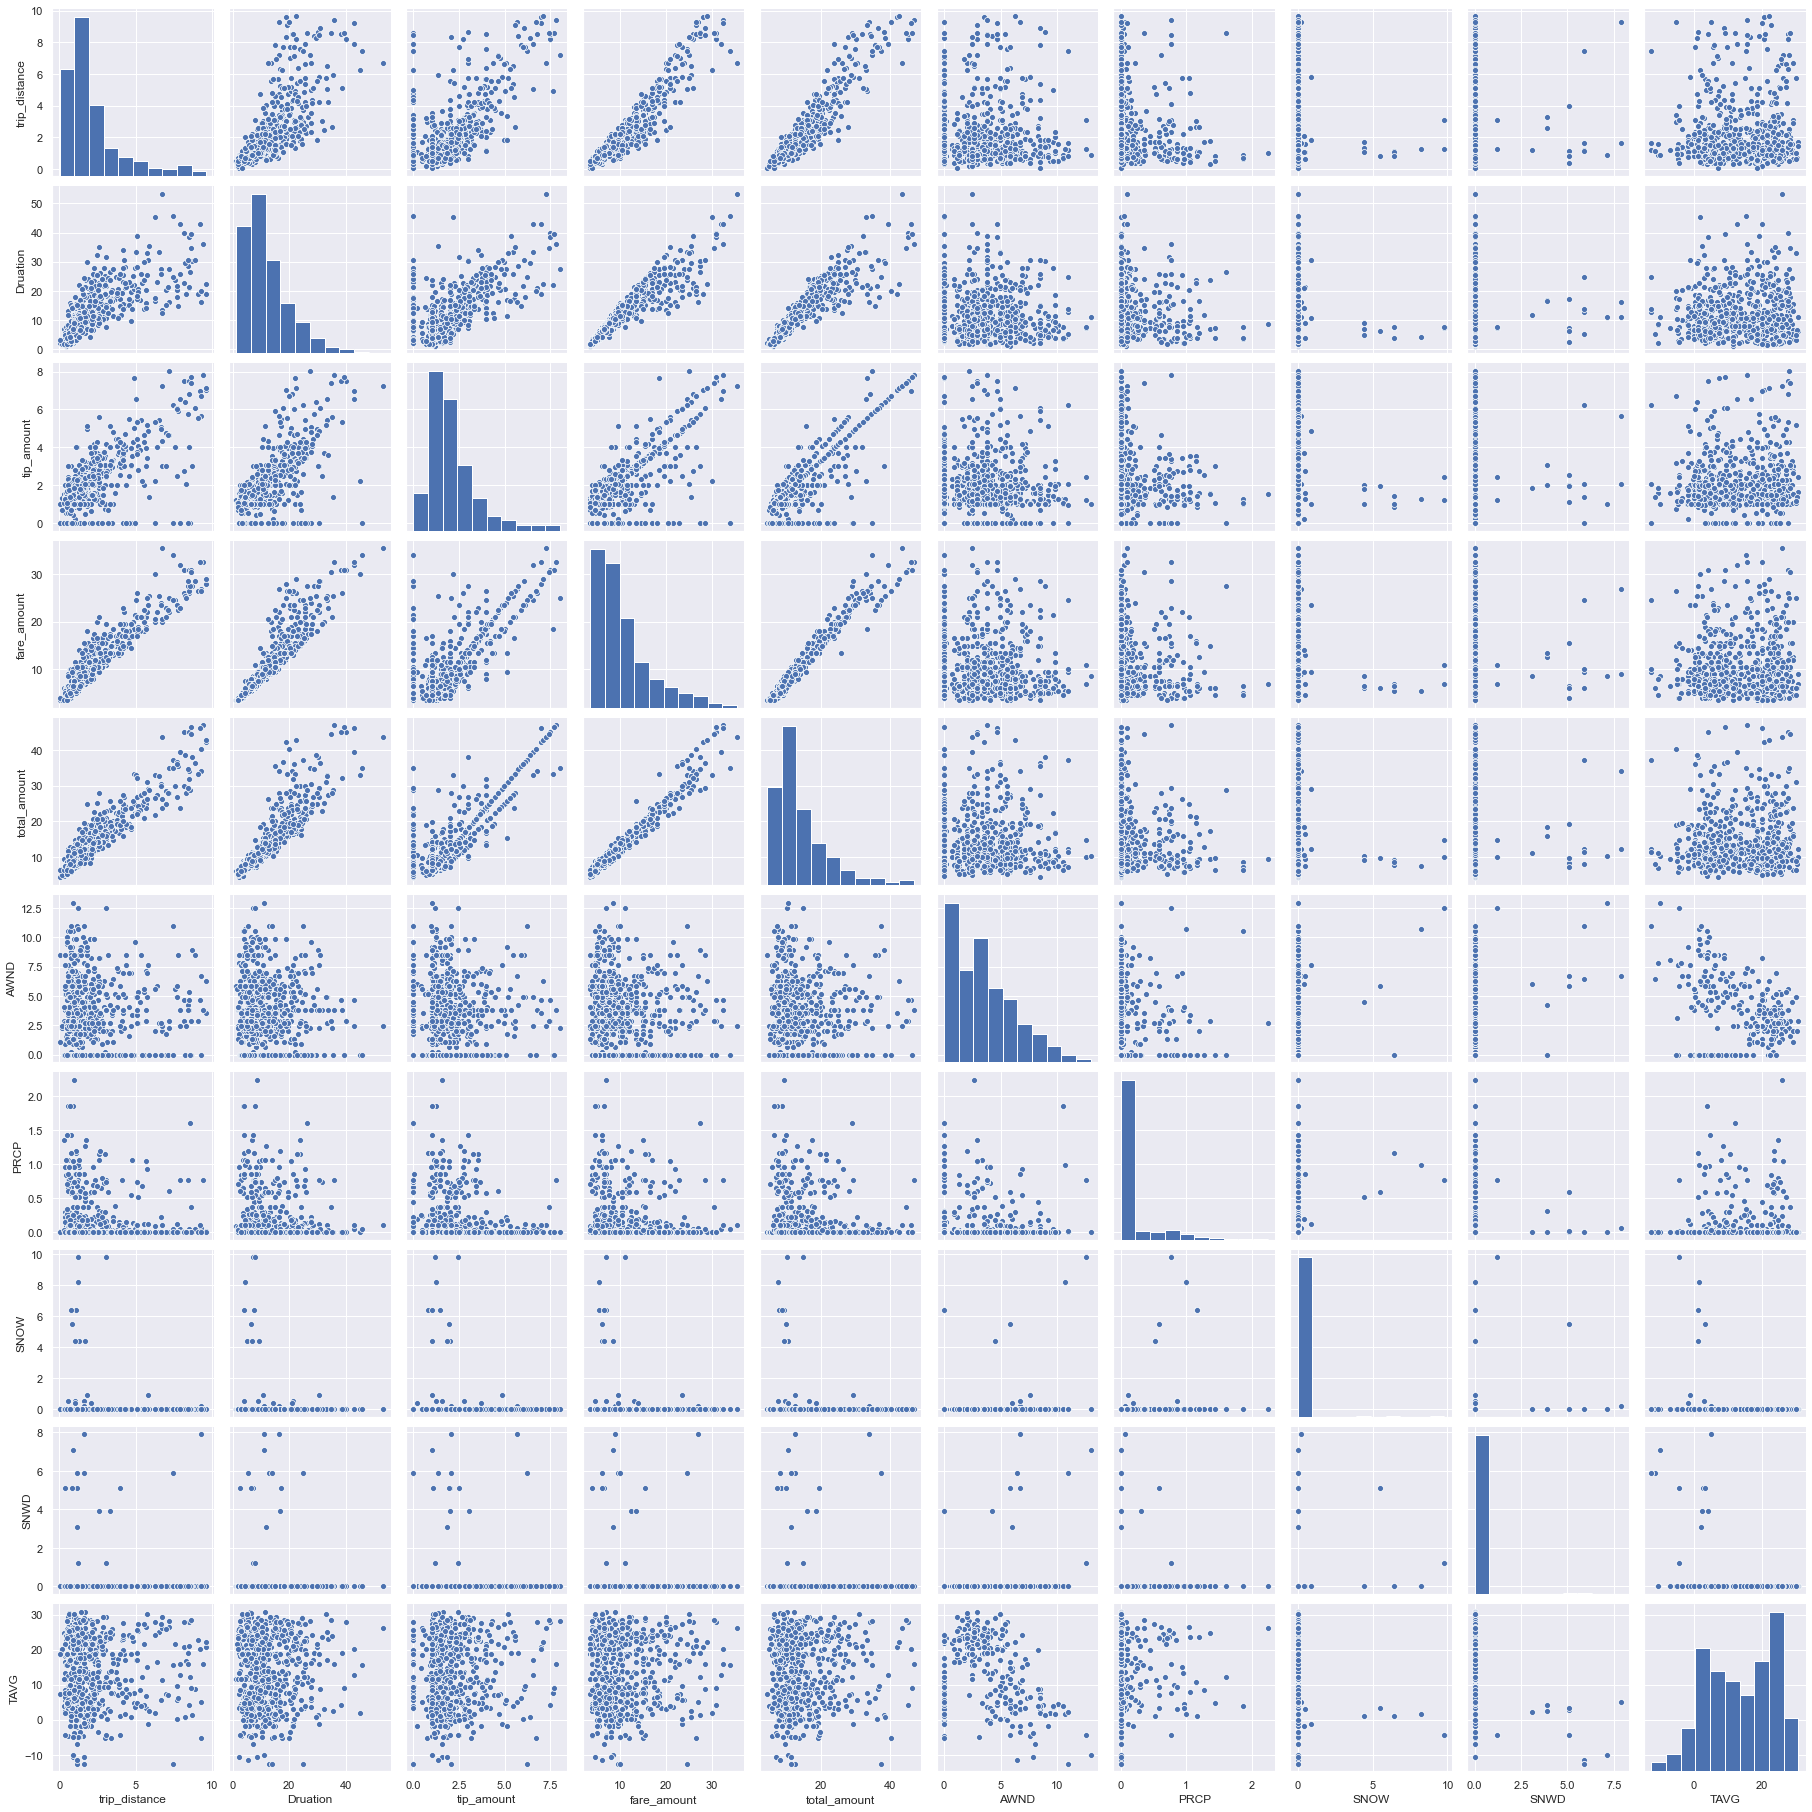

In [34]:
sns.pairplot(pair[col])
#plt.title('Pair Plot for Tips and Weather',fontsize = 20)
plt.savefig("Pair Plot.png")
plt.show()

In [7]:
pair = data.sample(frac=0.001, replace=True, random_state=30034)

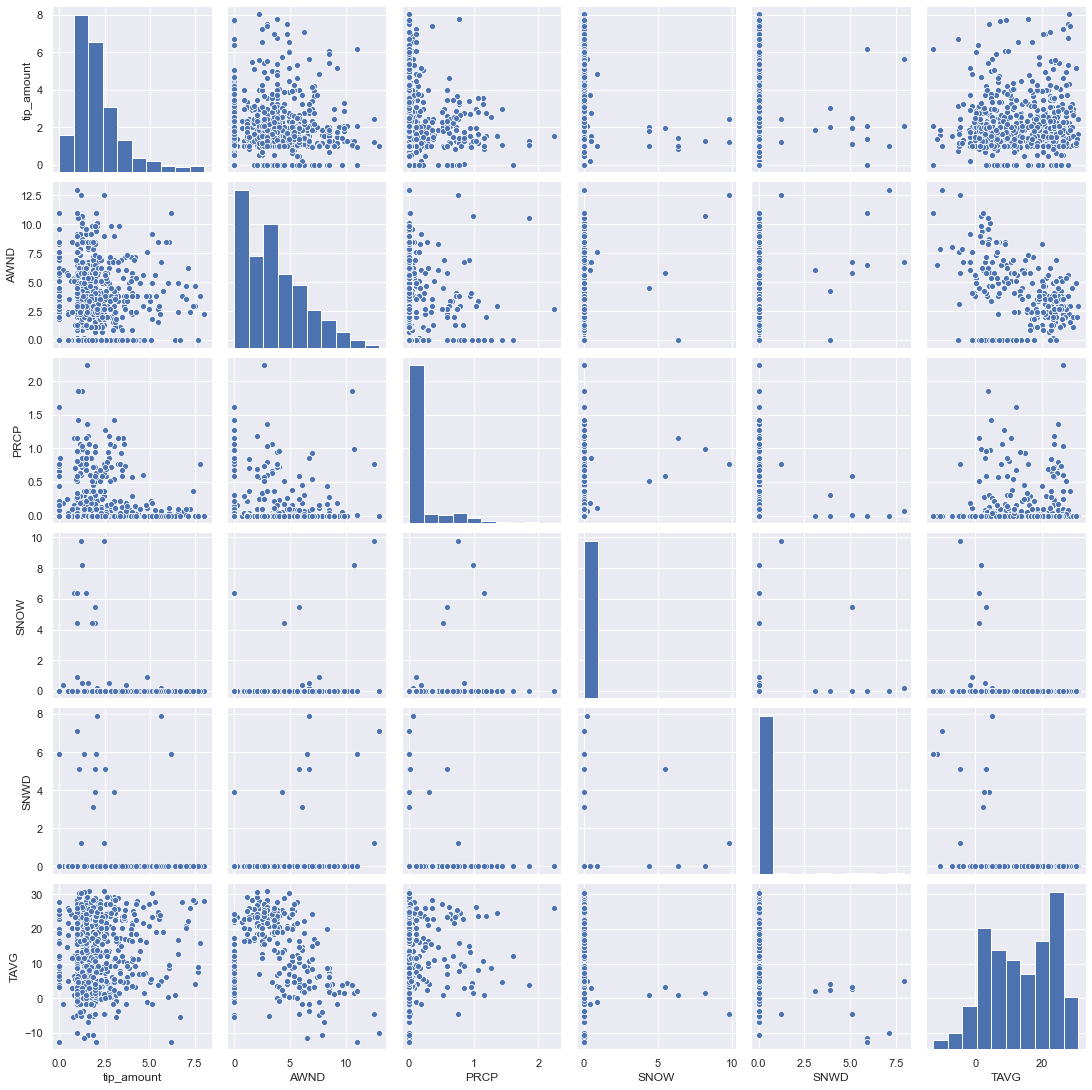

In [26]:
w_col = ["tip_amount","AWND","PRCP","SNOW","SNWD","TAVG"]
sns.pairplot(pair[w_col])
#plt.title('Pair Plot for Tips and Weather',fontsize = 20)
plt.savefig("Pair Plot for Tips and Weather.png")
plt.show()


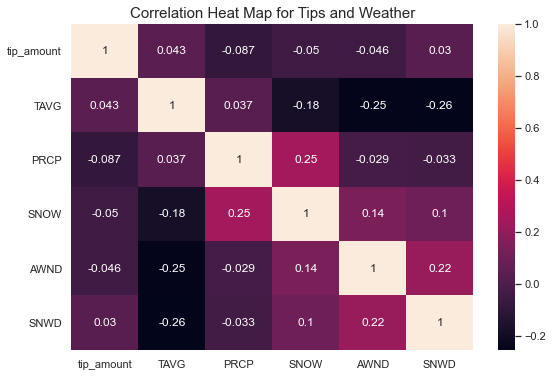

In [31]:
sns.set(rc={'figure.figsize':(9,6)})
w_corrMatrix =pair[w_col].corr() 
sns.heatmap(cluster_corr(w_corrMatrix), annot=True)
plt.title('Correlation Heat Map for Tips and Weather',fontsize = 15)
plt.savefig("Correlation Heat Map for Tips and Weather.png")
plt.show()

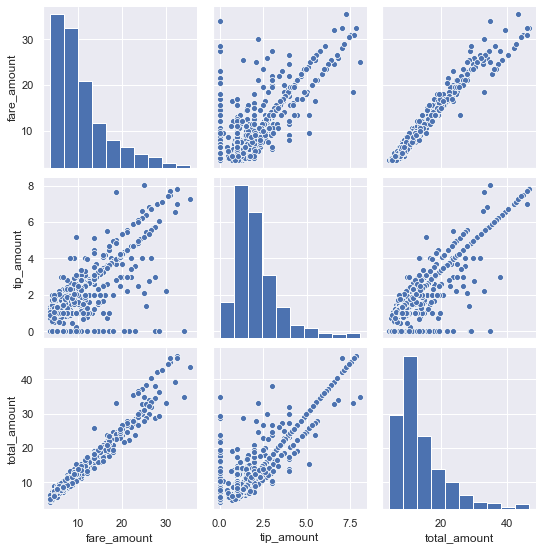

In [35]:
i_col = ["fare_amount","tip_amount","total_amount"]
sns.pairplot(pair[i_col])
#plt.title('Pair Plot for Tips and income',fontsize = 15)
plt.savefig("Pair Plot for Tips and income.png")
plt.show()

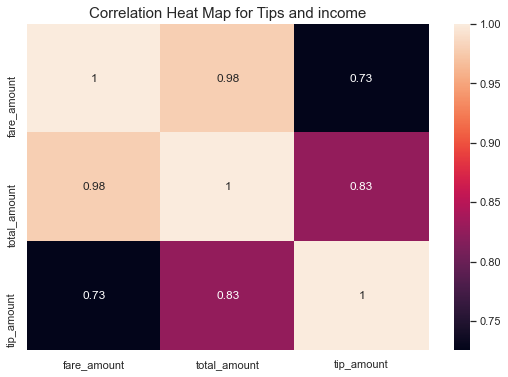

In [36]:
i_corrMatrix =pair[i_col].corr() 
sns.heatmap(cluster_corr(i_corrMatrix), annot=True)
plt.title('Correlation Heat Map for Tips and income',fontsize = 15)
plt.savefig("Correlation Heat Map for Tips and income.png")
plt.show()

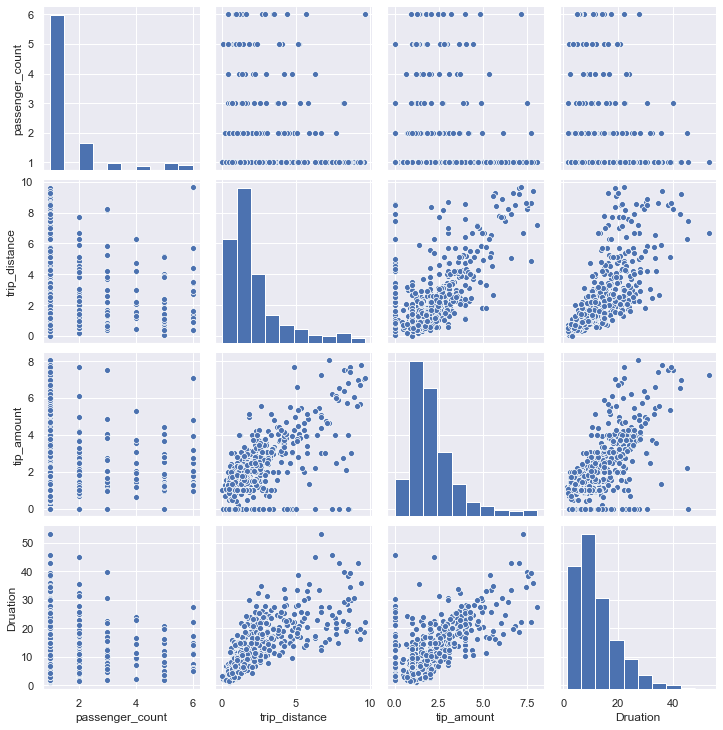

In [37]:
e_col = ["passenger_count","trip_distance","tip_amount","Druation"]
sns.pairplot(pair[e_col])
#plt.title('Pair Plot for Tips and Weather',fontsize = 20)
plt.savefig("Pair Plot for Tips and passenger,trip distance and duration.png")
plt.show()

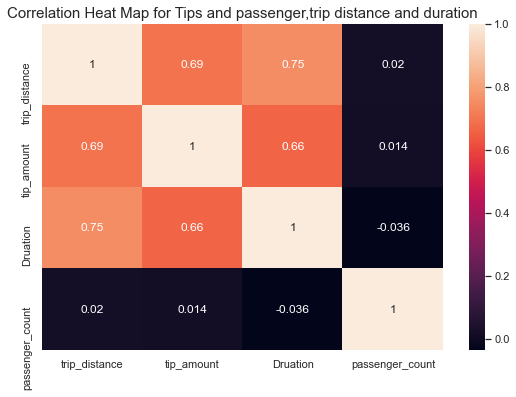

In [38]:
e_corrMatrix =pair[e_col].corr() 
sns.heatmap(cluster_corr(e_corrMatrix), annot=True)
plt.title('Correlation Heat Map for Tips and passenger,trip distance and duration',fontsize = 15)
plt.savefig("Correlation Heat Map for Tips and passenger,trip distance and duration.png")
plt.show()